# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'BC3C'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(14, 104)


,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,ASG002_BC3C_24H:C13,...,MOAR010_BC3C_24H:L20,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:F07,MOAR011_BC3C_24H:F08,MOAR011_BC3C_24H:F09,MOAR011_BC3C_24H:J10
Androgen,-0.052923,-0.009974,0.001757,-0.040040,0.001745,0.019889,0.004140,0.015856,0.021100,0.035611,...,-0.044382,-0.015540,-0.001313,-0.008510,-0.052020,-0.004399,-0.054581,0.029686,0.026729,-0.585180
CDK1,-1.371527,-1.095251,0.156729,-0.416694,0.141833,-0.397212,0.174571,0.359171,0.120268,0.190067,...,-0.040808,-0.070745,-0.292843,-0.172810,-0.211205,-0.064074,-0.955350,0.019779,-0.051689,-0.084595
CDK2,-0.198739,-0.179200,-0.034046,-0.010016,-0.002004,-0.026154,0.010697,-0.035971,0.028113,-0.004405,...,-0.040448,-0.012437,-0.001918,-0.002106,-0.022549,0.023467,-0.058564,-0.029579,-0.032771,-0.004778
CDK4_6,-0.024786,-0.233070,-0.041343,-0.512842,0.040180,0.002070,-0.007849,0.097854,0.085940,0.031930,...,-0.571649,0.048223,0.097169,-0.089221,-1.034766,-1.206374,0.317459,0.198526,-0.063340,-0.014896
EGFR,0.594302,0.494854,0.227074,0.365559,0.489237,0.112625,-0.412975,0.263036,0.284577,-0.047030,...,0.177804,0.042588,-0.056614,-0.036438,-0.087508,-0.424268,-0.441998,-0.554539,-0.315115,-0.228102
Estrogen,-0.127051,-0.212308,-0.211572,-0.410824,-0.946347,-0.309627,-0.085559,-0.240940,-0.165757,-0.041252,...,-0.083507,0.059879,0.040587,-0.012869,0.020850,0.134703,-1.518803,-0.225347,0.185686,-0.272171
FGFR,-0.112271,-0.187148,-0.090419,0.052235,-0.029786,-0.409007,-0.028128,-0.046896,-0.067067,-0.291842,...,0.161043,-0.015421,0.066762,-0.002451,0.041444,-0.292799,-0.543559,0.042138,0.230391,0.057342
PI3K,-1.907763,-1.695924,-1.449386,-1.244767,-0.697896,0.285072,-0.134038,-0.243812,-0.825338,-0.278903,...,-0.047557,-0.156763,-0.023753,-0.479838,-0.458757,0.035189,-0.773614,0.236607,-0.235869,0.029959
p53,-0.218702,-0.221255,-0.132064,-0.413537,0.047194,-1.628940,-1.474679,-0.119654,-0.086778,-1.324326,...,-0.307034,0.250068,0.023041,0.228404,0.201298,0.285172,-0.226091,-0.050497,0.028624,0.600756
TOP2A,-0.158657,0.118153,-0.222998,-0.149732,-0.124037,0.034621,0.080546,-1.994295,-0.189920,-0.307524,...,0.011648,0.136403,0.133846,-0.079527,-0.387488,0.095069,-0.682865,0.036211,0.009586,-0.387089


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-32.29022953772266
19.755130612438


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(14, 104)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Src,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Src,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [9]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [10]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [11]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000323,0.000000,0.000000,0.000331,0.0,0.0,0.0
CDK1,0.0,0.000000,0.424112,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
CDK2,0.0,0.361753,0.000000,0.000000,0.000000,0.000000,0.652538,0.004222,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.199554,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.295386,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.546153,0.0,0.0,0.0
FGFR,0.0,0.000000,0.060393,0.039056,1.000000,0.040379,0.000000,0.980670,1.000000,0.000000,0.012776,0.0,0.0,0.0
PI3K,0.0,1.000000,0.000000,0.000000,0.919398,0.236580,0.000000,0.000000,0.000170,1.000000,0.317838,0.0,0.0,0.0
p53,0.0,0.001694,0.000000,0.000683,1.000000,0.001610,0.000845,0.960819,0.000000,0.032305,0.003208,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,1.000000,0.008344,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000e+00,0.000000,0.000000e+00,3.108624e-15,0.000000e+00,0.000000e+00,1.796842e-02,0.000000e+00,0.000000e+00,1.820191e-02,0.0,0.0,0.0
CDK1,0.0,0.000000e+00,0.494208,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.332268e-15,0.000000e+00,0.000000e+00,1.332268e-15,0.0,0.0,0.0
CDK2,0.0,4.805079e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.761640e-01,6.484254e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK4_6,0.0,0.000000e+00,0.000000,0.000000e+00,2.442491e-15,0.000000e+00,0.000000e+00,2.442491e-15,0.000000e+00,0.000000e+00,3.996650e-01,0.0,0.0,0.0
EGFR,0.0,0.000000e+00,0.000000,1.776357e-15,0.000000e+00,0.000000e+00,4.562160e-01,1.776357e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Estrogen,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.110223e-16,1.110223e-16,0.000000e+00,0.000000e+00,4.978654e-01,0.0,0.0,0.0
FGFR,0.0,0.000000e+00,0.238213,1.937280e-01,4.218847e-15,1.968456e-01,0.000000e+00,1.376806e-01,4.218847e-15,0.000000e+00,1.123063e-01,0.0,0.0,0.0
PI3K,0.0,5.551115e-15,0.000000,0.000000e+00,2.722235e-01,4.249823e-01,0.000000e+00,0.000000e+00,1.304953e-02,5.551115e-15,4.656363e-01,0.0,0.0,0.0
p53,0.0,4.112250e-02,0.000000,2.613333e-02,3.885781e-15,4.009854e-02,2.906330e-02,1.940261e-01,0.000000e+00,1.768086e-01,5.654762e-02,0.0,0.0,0.0
TOP2A,0.0,0.000000e+00,0.000000,0.000000e+00,2.442491e-15,9.096348e-02,0.000000e+00,2.442491e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.000000,-0.046108,0.000000,0.000000,0.000003,0.000000,0.000000,4.228591e-07,0.0,0.0,0.0
CDK1,0.0,0.000000,0.225182,0.000000,0.000000,0.000000,0.000000,0.303832,0.000000,0.000000,2.841370e-01,0.0,0.0,0.0
CDK2,0.0,0.018474,0.000000,0.000000,0.000000,0.000000,0.042085,0.000109,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.000000,0.374103,0.000000,0.000000,0.149105,0.000000,0.000000,1.676337e-02,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,0.239693,0.000000,0.000000,0.055593,-0.301702,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.260343,0.140289,0.000000,0.000000,4.898965e-02,0.0,0.0,0.0
FGFR,0.0,0.000000,0.025180,0.005884,0.357829,0.007549,0.000000,0.132069,0.132683,0.000000,6.648965e-04,0.0,0.0,0.0
PI3K,0.0,0.362537,0.000000,0.000000,-0.161761,0.058122,0.000000,0.000000,0.000010,0.571282,-4.977514e-02,0.0,0.0,0.0
p53,0.0,-0.000059,0.000000,-0.000011,0.237892,0.000129,0.000050,0.172092,0.000000,0.008099,4.143687e-05,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,-0.130223,0.001115,0.000000,0.152915,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.000000,0.010817,0.000000,0.000000,0.000181,0.000000,0.000000,0.000046,0.0,0.0,0.0
CDK1,0.0,0.000000,0.265886,0.000000,0.000000,0.000000,0.000000,0.015186,0.000000,0.000000,0.010606,0.0,0.0,0.0
CDK2,0.0,0.024999,0.000000,0.000000,0.000000,0.000000,0.032106,0.001717,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.000000,0.021668,0.000000,0.000000,0.014789,0.000000,0.000000,0.034929,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,0.036346,0.000000,0.000000,0.088353,0.012584,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035495,0.017798,0.000000,0.000000,0.048088,0.0,0.0,0.0
FGFR,0.0,0.000000,0.102489,0.030438,0.040030,0.038073,0.000000,0.035594,0.033731,0.000000,0.006325,0.0,0.0,0.0
PI3K,0.0,0.036411,0.000000,0.000000,0.056706,0.107863,0.000000,0.000000,0.000804,0.046971,0.077032,0.0,0.0,0.0
p53,0.0,0.001940,0.000000,0.000845,0.053304,0.003897,0.002494,0.055993,0.000000,0.046069,0.002095,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.023639,0.012273,0.000000,0.022338,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [12]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.007269,0.001570,-0.013564,-0.056525,0.001552,-0.002672,0.018222,-0.000354,0.010407,0.001006,-1.181980e-17,-1.112805e-16,-3.898849e-18
CDK1,4.623573e-16,1.371973,0.310573,-0.014373,-0.061554,0.211503,0.064712,0.344551,0.008590,0.196905,0.382842,-5.192387e-17,3.965125e-16,8.805638e-16
CDK2,3.436837e-16,0.026543,1.007098,0.004290,0.016804,0.004563,0.044506,0.008999,0.005905,0.005189,0.007419,-9.242192e-17,-6.483225e-17,-1.311483e-16
CDK4_6,9.221851e-16,0.035514,0.008688,1.098326,0.409544,0.016553,0.027443,0.050924,0.003642,0.029122,0.026797,4.302912e-16,8.302509e-16,2.351457e-16
EGFR,6.768478e-16,-0.157609,-0.034031,0.294187,1.225925,-0.033637,0.057964,-0.395110,0.007687,-0.225657,-0.021793,3.019424e-16,7.406051e-16,1.299993e-16
Estrogen,-7.444475e-16,0.118981,0.033819,0.018335,0.069646,1.051461,0.279037,0.194066,0.037026,0.111166,0.076152,-6.846815e-16,3.078908e-17,1.163254e-15
FGFR,-2.585666e-16,0.027037,0.032000,0.108448,0.427191,0.015243,1.029071,0.059066,0.136541,0.034849,0.007997,4.973604e-16,1.639272e-16,1.355861e-16
PI3K,-8.205769e-18,0.555595,0.125596,-0.082521,-0.344749,0.127450,0.019301,1.360947,0.002575,0.777505,0.094997,-1.258306e-17,-4.910558e-17,8.704782e-17
p53,-6.848540e-17,0.058939,0.013704,0.055369,0.230625,0.014283,0.017167,0.142314,1.002279,0.089419,0.011344,-1.671602e-16,1.136415e-16,-1.172759e-16
TOP2A,-1.801649e-16,0.105616,0.023675,-0.050908,-0.212284,0.025042,-0.004286,0.259778,-0.000566,1.148402,0.017449,-4.595322e-16,-5.955247e-16,4.475535e-16


In [13]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,EGFR,Androgen,-4.610755e-02
1,PI3K,Androgen,3.224986e-06
2,Src,Androgen,4.228591e-07
3,CDK2,CDK1,2.251817e-01
4,PI3K,CDK1,3.038320e-01
5,Src,CDK1,2.841370e-01
6,CDK1,CDK2,1.847352e-02
7,FGFR,CDK2,4.208520e-02
8,PI3K,CDK2,1.085018e-04
9,EGFR,CDK4_6,3.741032e-01


In [14]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.0,0.000000,-0.046108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.303832,0.000000,0.000000,0.284137,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.0,0.000000,0.000000,0.000000,0.042085,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.0,-1.000000,0.374103,0.000000,0.000000,0.149105,0.000000,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,0.239693,-1.000000,0.000000,0.000000,-0.301702,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.0,0.000000,0.000000,-1.000000,0.260343,0.140289,0.000000,0.000000,0.048990,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.000000,0.357829,0.000000,-1.000000,0.132069,0.132683,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.362537,0.0,0.000000,-0.161761,0.000000,0.000000,-1.000000,0.000000,0.571282,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.237892,0.000000,0.000000,0.172092,-1.000000,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.000000,-0.130223,0.000000,0.000000,0.152915,0.000000,-1.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.007269,0.001570,-0.013564,-0.056525,0.001552,-0.002672,0.018222,-0.000354,0.010407,0.001006,-1.181980e-17,-1.112805e-16,-3.898849e-18
CDK1,4.623573e-16,1.371973,0.310573,-0.014373,-0.061554,0.211503,0.064712,0.344551,0.008590,0.196905,0.382842,-5.192387e-17,3.965125e-16,8.805638e-16
CDK2,3.436837e-16,0.026543,1.007098,0.004290,0.016804,0.004563,0.044506,0.008999,0.005905,0.005189,0.007419,-9.242192e-17,-6.483225e-17,-1.311483e-16
CDK4_6,9.221851e-16,0.035514,0.008688,1.098326,0.409544,0.016553,0.027443,0.050924,0.003642,0.029122,0.026797,4.302912e-16,8.302509e-16,2.351457e-16
EGFR,6.768478e-16,-0.157609,-0.034031,0.294187,1.225925,-0.033637,0.057964,-0.395110,0.007687,-0.225657,-0.021793,3.019424e-16,7.406051e-16,1.299993e-16
Estrogen,-7.444475e-16,0.118981,0.033819,0.018335,0.069646,1.051461,0.279037,0.194066,0.037026,0.111166,0.076152,-6.846815e-16,3.078908e-17,1.163254e-15
FGFR,-2.585666e-16,0.027037,0.032000,0.108448,0.427191,0.015243,1.029071,0.059066,0.136541,0.034849,0.007997,4.973604e-16,1.639272e-16,1.355861e-16
PI3K,-8.205769e-18,0.555595,0.125596,-0.082521,-0.344749,0.127450,0.019301,1.360947,0.002575,0.777505,0.094997,-1.258306e-17,-4.910558e-17,8.704782e-17
p53,-6.848540e-17,0.058939,0.013704,0.055369,0.230625,0.014283,0.017167,0.142314,1.002279,0.089419,0.011344,-1.671602e-16,1.136415e-16,-1.172759e-16
TOP2A,-1.801649e-16,0.105616,0.023675,-0.050908,-0.212284,0.025042,-0.004286,0.259778,-0.000566,1.148402,0.017449,-4.595322e-16,-5.955247e-16,4.475535e-16


In [15]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

150

In [16]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

32

### Visualization

In [45]:
df_subset=rm_filt_minus_inv[['Androgen', 'CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'p53','PI3K',  'TOP2A','Src']]
df_subset = df_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]

In [46]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of BC3C cell line under conditions ')

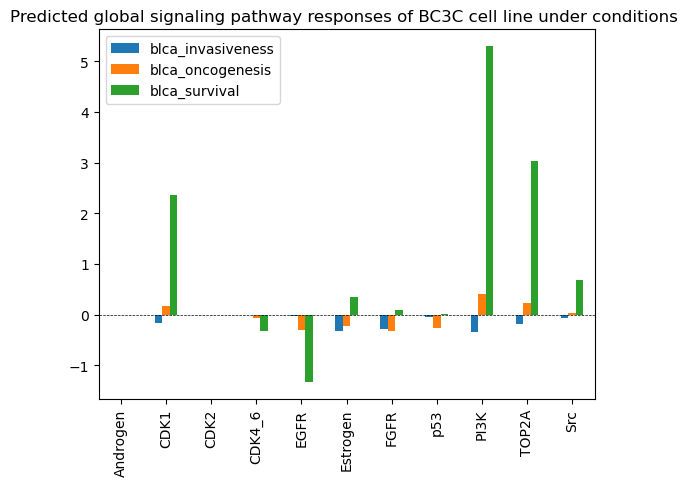

In [47]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [42]:
display(rm_filt)
rm_subset=rm_filt[['Androgen','CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A','Src']]

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.0,0.000000,-0.046108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.303832,0.000000,0.000000,0.284137,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.0,0.000000,0.000000,0.000000,0.042085,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.0,-1.000000,0.374103,0.000000,0.000000,0.149105,0.000000,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,0.239693,-1.000000,0.000000,0.000000,-0.301702,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.0,0.000000,0.000000,-1.000000,0.260343,0.140289,0.000000,0.000000,0.048990,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.000000,0.357829,0.000000,-1.000000,0.132069,0.132683,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.362537,0.0,0.000000,-0.161761,0.000000,0.000000,-1.000000,0.000000,0.571282,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.237892,0.000000,0.000000,0.172092,-1.000000,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.000000,-0.130223,0.000000,0.000000,0.152915,0.000000,-1.000000,0.000000,0.0,0.0,0.0


In [43]:
rm_subset=rm_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.000000,0.000000,0.000000
CDK1,0.000000,0.000000,0.000000
CDK2,0.000000,0.000000,0.000000
CDK4_6,0.000000,0.000000,0.000000
EGFR,0.000000,0.000000,0.000000
Estrogen,-0.289163,-0.237161,0.000000
FGFR,-0.207687,-0.271190,0.000000
PI3K,-0.206162,0.365985,3.989432
p53,0.000000,-0.222187,0.000000
TOP2A,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of BC3C cell line under conditions ')

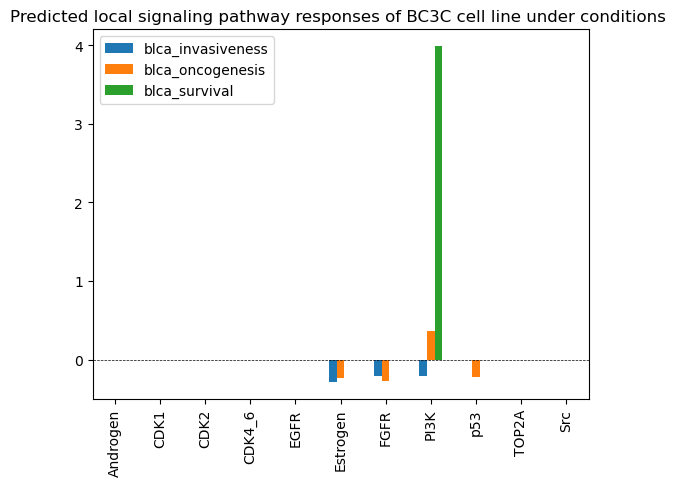

In [44]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")